START DATE: 17/07/2025






FINISH DATE: 25/07/2025
## Goal: Build a model to predict if a company will go bankrupt or not

### Objectives:
1. Import and unzip JSON data
2. Load data into dataframe
3. EDA (Exploratory Data Analysis)
4. Split Data
5. Build and Evalute at least 2 Models, then select the one with the best performance
6. Communicate result

In [157]:
import gzip
import pickle
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from ipywidgets import FloatSlider, interact
from IPython.display import display

In [78]:
#Load JSON file into notebook

with gzip.open("DATA/poland-bankruptcy-data-2009.json.gz", "r") as f:
    poland_data= json.load(f)
    
print(type(poland_data))

<class 'dict'>


### Exploratory Data Analysis

In [79]:
poland_data.keys()

dict_keys(['schema', 'data', 'metadata'])

In [4]:
poland_data["schema"]

{'fields': [{'name': 'company_id', 'type': 'integer'},
  {'name': 'feat_1', 'type': 'number'},
  {'name': 'feat_2', 'type': 'number'},
  {'name': 'feat_3', 'type': 'number'},
  {'name': 'feat_4', 'type': 'number'},
  {'name': 'feat_5', 'type': 'number'},
  {'name': 'feat_6', 'type': 'number'},
  {'name': 'feat_7', 'type': 'number'},
  {'name': 'feat_8', 'type': 'number'},
  {'name': 'feat_9', 'type': 'number'},
  {'name': 'feat_10', 'type': 'number'},
  {'name': 'feat_11', 'type': 'number'},
  {'name': 'feat_12', 'type': 'number'},
  {'name': 'feat_13', 'type': 'number'},
  {'name': 'feat_14', 'type': 'number'},
  {'name': 'feat_15', 'type': 'number'},
  {'name': 'feat_16', 'type': 'number'},
  {'name': 'feat_17', 'type': 'number'},
  {'name': 'feat_18', 'type': 'number'},
  {'name': 'feat_19', 'type': 'number'},
  {'name': 'feat_20', 'type': 'number'},
  {'name': 'feat_21', 'type': 'number'},
  {'name': 'feat_22', 'type': 'number'},
  {'name': 'feat_23', 'type': 'number'},
  {'name': 

In [80]:
poland_data["metadata"]

{'title': 'Ensemble Boosted Trees with Synthetic Features Generation in Application to Bankruptcy Prediction',
 'authors': 'Zieba, M., Tomczak, S. K., & Tomczak, J. M.',
 'journal': 'Expert Systems with Applications',
 'publicationYear': 2016,
 'dataYear': 2009,
 'articleLink': 'doi:10.1016/j.eswa.2016.04.001',
 'datasetLink': 'https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'}

In [81]:
#check for the number of companies
len(poland_data["data"])

9977

In [82]:
#check for the number of features present
len(poland_data["data"][1])

66

In [83]:
#iterate through the companies to ensure the all have equal number of features
for item in poland_data["data"]:
    if len(item) != 66:
        print("ALERT")

In [84]:
#Load data to DataFrame
df= pd.DataFrame.from_dict(poland_data["data"]).set_index("company_id")
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [85]:
#Create a wrangle function to import  json data and load to dataframe

def wrangle(filepath):
    with gzip.open(filepath, "r") as f:
        data= json.load(f)
        
    df= pd.DataFrame.from_dict(data["data"]).set_index("company_id")

    return df

In [86]:
wrangle("DATA/poland-bankruptcy-data-2009.json.gz")
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [12]:
#Inspect Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   float64


In [13]:
#Observation: We have missing data

In [87]:
df.shape

(9977, 65)

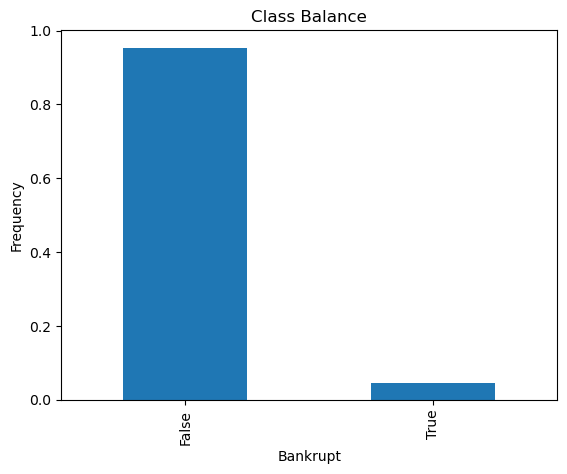

In [15]:
#Plot and Check the class balance for the target- "bankrupt"
df["bankrupt"].value_counts(normalize=True).plot(
    xlabel="Bankrupt",
    ylabel="Frequency",
    title="Class Balance",
    kind="bar"
);

In [88]:
df.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
count,9977.000000,9977.000000,9977.000000,9960.000000,9.952000e+03,9977.000000,9977.000000,9964.000000,9974.000000,9977.000000,...,9.977000e+03,9935.000000,9977.000000,9948.000000,9977.000000,9.415000e+03,9961.00000,9.935000e+03,9960.000000,9765.000000
mean,0.052688,0.623634,0.088614,10.067323,-1.412557e+03,-0.124340,0.065407,16.757657,1.820532,0.362319,...,6.771696e+03,-0.561651,-0.028476,3.976806,1.486227,5.938426e+02,13.62412,1.364510e+02,9.034435,36.291450
std,0.662816,6.590734,6.584543,537.128699,1.216712e+05,7.145680,0.666113,673.845491,7.771473,6.592272,...,6.121491e+04,57.438557,19.134737,195.155108,79.262784,3.812344e+04,73.22837,2.666901e+04,31.773572,438.506192
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.59030,-2.336500e+06,-0.000156,-0.000102
25%,0.000700,0.255280,0.016341,1.036150,-5.266650e+01,0.000000,0.002265,0.430778,1.011100,0.296990,...,1.304300e+01,0.005136,0.007051,0.875850,0.000000,5.532000e+00,4.49120,4.101200e+01,3.049300,2.003100
50%,0.042731,0.465920,0.197570,1.600650,1.495950e+00,0.000000,0.050661,1.104150,1.197300,0.513340,...,8.874800e+02,0.051546,0.106550,0.953130,0.003356,9.933700e+00,6.67050,7.093200e+01,5.116700,4.031400
75%,0.123140,0.690060,0.415680,2.950525,5.601725e+01,0.071759,0.141700,2.827425,2.044550,0.723920,...,4.363300e+03,0.129640,0.271860,0.995923,0.249600,2.077800e+01,10.58400,1.187050e+02,8.846400,9.574000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4246.70000,1.073500e+06,1974.500000,21499.000000


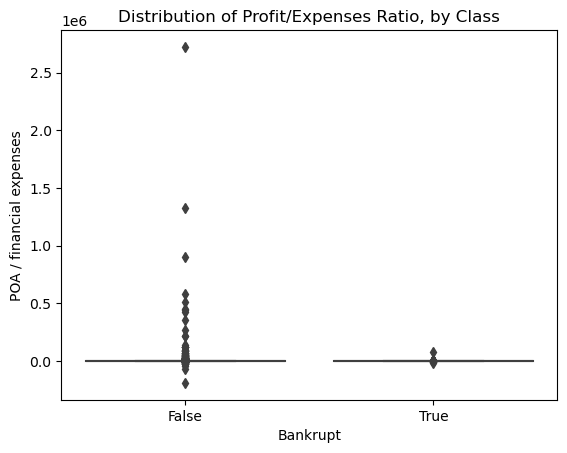

In [89]:
#Examine a random feature to see if we have a balanced data
#I'll pick feature 27
#Create Boxplot
sns.boxplot(x="bankrupt", y="feat_27", data=df)

plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [90]:
# Summary statistics for `feat_27`
df["feat_27"].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

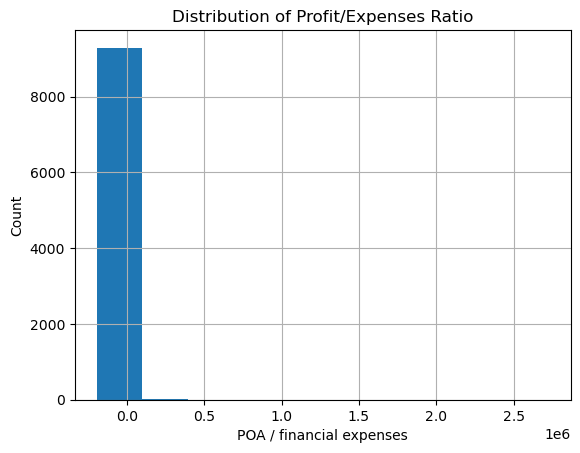

In [91]:
# Plot histogram of `feat_27`
df["feat_27"].hist()

plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

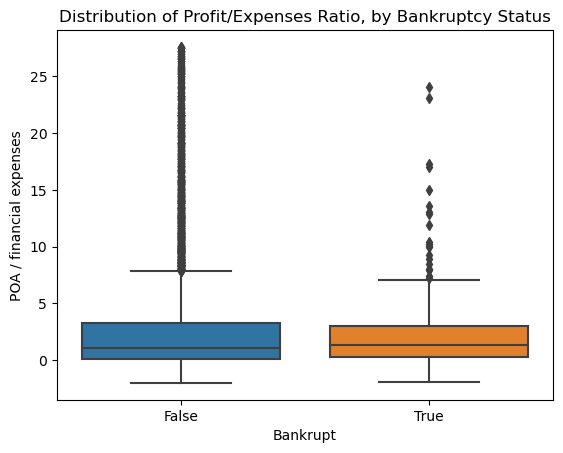

In [92]:
# Create clipped boxplot
q1, q9= df["feat_27"].quantile([0.1, 0.9])
mask= df["feat_27"].between(q1, q9)
sns.boxplot(x="bankrupt", y="feat_27", data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

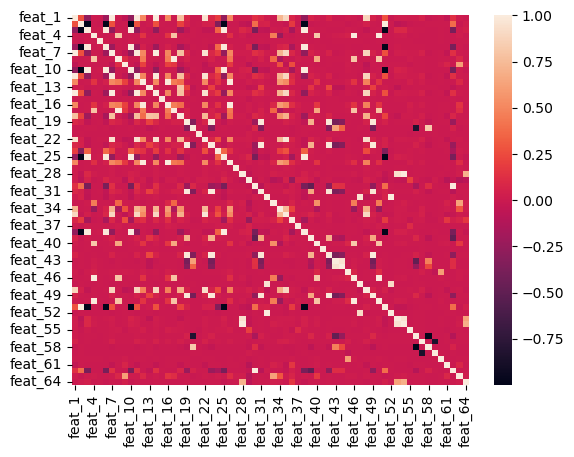

In [93]:
#plot correlation heat map
corr = df.drop(columns="bankrupt").corr()
sns.heatmap(corr);

### Deductions From EDA
1. Imbalanced data was identified
2. Missing data were identified in a lot of features- there might be need for imputers
3. It was observed that some features are skewed to one side, so I'll consider using a model that supports skewed data like decision tree (still a consideration)
4. From the correlation heatmap, the correlation seem complex so a linear model won't be a good option



### Split Data

In [94]:
#Vertical split (into features and targets)
target= "bankrupt"
X= df.drop(columns=target)
y= df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9977, 64)
y shape: (9977,)


In [95]:
#Horizontal Split (into train and test set)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


### Resample Data
Now that the data has been splitted to train and test set, I'll consider resampling the train_data set because we have less positive class (i.e, only few companies went bankrupt, so this imbalanced data might affect our model accuracy or robustness).
I'll explore the following options, build a model with:
1. Original data
2. Undersampled data
3. Oversampled data

N.B: I'm not resampling the test_data set to avoid bias when we are testing our model

In [24]:
#conda install -c conda-forge imbalanced-learn

In [96]:
y_train.isna().sum()

0

In [97]:
#Undersampled Data
under_sampler= RandomUnderSampler(random_state=42)
X_train_under, y_train_under= under_sampler.fit_resample(X_train, y_train)

print(X_train_under.shape)
X_train_under.head()

(768, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
company_id,,,,,,,,,,,,,,,,,,,,,
1509,0.121400,0.097238,0.74500,8.66160,25.8370,0.000000,0.158840,9.284100,2.7588,0.902760,...,775.71,0.075999,0.13447,0.94243,0.000000,4.9049,11.3390,12.865,28.3720,17.4870
6096,0.316280,0.264920,0.65346,3.46660,55.1890,0.290140,0.316280,2.774700,2.4721,0.735080,...,1367.90,0.119990,0.43027,0.87412,0.000000,10.6020,4.5533,39.115,9.3314,30.2870
7369,0.066615,0.890270,-0.48007,0.46076,-76.3080,0.047487,0.087936,-0.011406,1.0952,-0.010155,...,-46566.00,0.086894,-6.56010,0.91311,0.000000,32.0280,10.0480,105.220,3.4689,5.2362
5268,0.208000,0.363630,0.33875,1.93160,-5.3169,0.251870,0.258280,1.603300,1.0535,0.583020,...,187050.00,0.050746,0.35676,0.94925,0.000000,34.8840,19.0030,24.498,14.8990,18.2040
395,0.096863,0.299320,0.35393,2.42640,31.5630,0.267550,0.125130,2.341000,1.0495,0.700680,...,2993.00,0.047123,0.13824,0.95288,0.073041,13.7820,6.8621,39.668,9.2013,5.7376


In [98]:
over_sampler= RandomOverSampler(random_state=42)
X_train_over, y_train_over= over_sampler.fit_resample(X_train, y_train)

print(X_train_over.shape)
X_train_over.head()

(15194, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.279320,0.053105,0.852030,17.0440,199.080,0.741770,0.353570,16.00600,1.2346,0.84997,...,52857.00,0.190040,0.328630,0.80996,0.00000,NaN,4.1858,11.002,33.1760,18.5720
1,0.001871,0.735120,0.156460,1.2269,-10.837,0.000000,0.002938,0.36032,1.4809,0.26488,...,440.02,0.014794,0.007064,0.99803,0.00000,7.4268,2.2925,169.960,2.1476,9.6185
2,0.113940,0.490250,0.077121,1.2332,-43.184,-0.000171,0.113940,1.03980,1.1649,0.50975,...,4617.40,0.214890,0.223520,0.78761,0.27412,6.2791,6.1622,103.630,3.5220,1.9673
3,0.008136,0.652610,0.148120,1.2628,29.071,0.000000,0.008136,0.53230,1.2891,0.34739,...,920.98,0.045169,0.023421,0.99434,0.14403,22.7480,2.2673,159.580,2.2872,4.4718
4,0.045396,0.279640,0.708730,3.7656,238.120,0.000000,0.056710,2.57610,1.0169,0.72036,...,10744.00,0.047501,0.063019,0.94624,0.00000,13.8860,49.0660,91.984,3.9681,29.0460


In [99]:
#Baseline Accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9519


In [100]:
# Fit on normal, under_sampled and over_sampled `X_train`, `y_train`

model_reg = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)  

# Fit on `X_train_under`, `y_train_under`

model_under = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under) 

# Fit on `X_train_over`, `y_train_over`

model_over = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over) 

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [102]:
#calculate accuracy score for the 3 models
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9359
Training Accuracy: 0.7421
Test Accuracy: 0.7104
Training Accuracy: 1.0
Test Accuracy: 0.9344


##### From the accuracy scores, our undersampled model seem not to be doing pretty well, henceforth we will have to focus on the regular and over_sampled model.
Also, none of the model was able to produce an accuracy score which exceeds the baseline score, which means more work still needs to be done on the model.


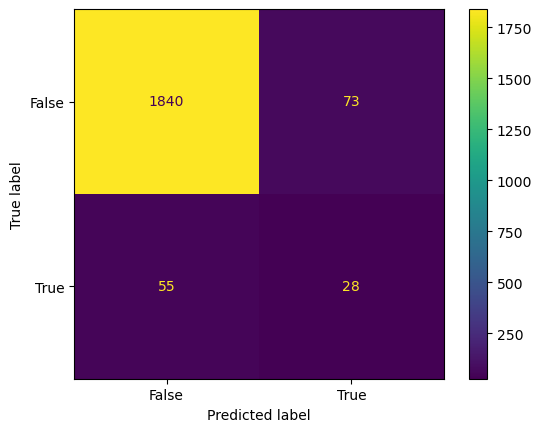

In [103]:
#plot confsion matrix
# Confusion matrix gives us a deeper insight on how our model performs in terms of accuracy
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

In [104]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

33


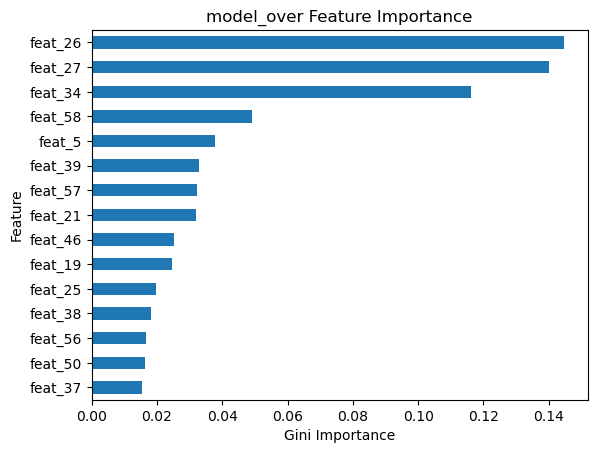

In [33]:
#Communicate Result
#Let's identify the important feature that contribte majorly to the performance of our model


importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()
# Plot series
feat_imp.tail(15).plot(kind="barh")



plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [105]:
#Build another model using an Ensemble Model
clf= make_pipeline(SimpleImputer(),
                  RandomForestClassifier(random_state=42)
                  )

print (clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


### Cross Validation
#### How it works

The dataset is divided into k subsets (folds).

The model is trained on k-1 folds and tested on the remaining 1 fold.

This is repeated k times, with each fold serving as the test set once.

The average score across all folds is used as the performance metric.

N.B: default number of "k" is usually 5



In [106]:
#CrossValidation
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99670944 0.99835472 0.99769661 0.9970385  0.99901251]


### Parameter Grid
Parameter grid simply allows you to systematically explore for the best combination of hyperparameters that give the highest performance for your model.

In [107]:
#Parameter Grid
params = {
    "simpleimputer__strategy": ["mean", "median"] ,
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [108]:
#Grid Search
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [109]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [39]:
model.cv_results_

{'mean_fit_time': array([ 6.73006306,  7.04639959, 13.28088546, 13.40488081, 19.77979684,
        20.16106114,  7.47178688,  7.8063221 , 15.27259665, 15.90651064,
        22.52811818, 23.36202345,  7.94198341,  7.68320708, 14.98638067,
        15.18032351, 23.18233523, 23.45534158,  8.16463232,  7.69752784,
        17.40220723, 22.82063909, 31.60301609, 31.31216993]),
 'std_fit_time': array([0.06461806, 0.22066321, 0.18655528, 0.17134817, 0.39280354,
        0.32866194, 0.18698586, 0.39882912, 0.29926621, 0.40948556,
        0.32118112, 0.63960112, 0.52133003, 0.30103002, 1.00649492,
        1.96341746, 0.38297646, 0.13276216, 0.25550083, 0.33461974,
        2.86085176, 1.50512953, 0.57638509, 1.88855545]),
 'mean_score_time': array([0.06077371, 0.0824605 , 0.08405347, 0.07939134, 0.12677317,
        0.12949414, 0.06018405, 0.06861024, 0.10522389, 0.0998188 ,
        0.14451942, 0.15835195, 0.06591001, 0.05618777, 0.09055381,
        0.11834812, 0.14639525, 0.14502831, 0.06665201, 0.05

In [110]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.400814,0.262729,0.083368,0.014723,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979269,0.977295,0.977953,0.980915,0.982225,0.979532,0.001829,21
1,9.195546,0.336964,0.078559,0.015198,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978611,0.969069,0.975650,0.970056,0.974984,0.973674,0.003586,24
2,19.233386,0.356067,0.136026,0.015140,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.983218,0.979599,0.978282,0.984534,0.983871,0.981901,0.002488,20
3,16.747793,2.261370,0.095425,0.006579,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980257,0.971043,0.978940,0.978282,0.977617,0.977228,0.003213,23
4,20.892191,0.211655,0.134471,0.019441,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.984205,0.980586,0.976966,0.984534,0.984529,0.982164,0.002996,19
5,20.914398,0.487426,0.145603,0.024144,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980915,0.972688,0.981573,0.979928,0.981567,0.979334,0.003377,22
6,7.863879,0.231065,0.066510,0.009714,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996380,0.997038,0.995722,0.995393,0.997367,0.996380,0.000750,17
7,8.597706,0.214121,0.070219,0.006522,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995722,0.996709,0.997368,0.996380,0.998025,0.996841,0.000795,14
8,16.221839,0.544019,0.143603,0.034842,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996709,0.996709,0.995722,0.995064,0.997367,0.996314,0.000816,18
9,20.022603,1.143573,0.128295,0.018002,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996051,0.997368,0.998026,0.996709,0.998354,0.997302,0.000843,11


In [111]:
#Training Time Vs N-Estimator
mask=cv_results["param_randomforestclassifier__max_depth"]==10
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.400814,0.262729,0.083368,0.014723,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979269,0.977295,0.977953,0.980915,0.982225,0.979532,0.001829,21
1,9.195546,0.336964,0.078559,0.015198,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978611,0.969069,0.975650,0.970056,0.974984,0.973674,0.003586,24
2,19.233386,0.356067,0.136026,0.015140,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.983218,0.979599,0.978282,0.984534,0.983871,0.981901,0.002488,20
3,16.747793,2.261370,0.095425,0.006579,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980257,0.971043,0.978940,0.978282,0.977617,0.977228,0.003213,23
4,20.892191,0.211655,0.134471,0.019441,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.984205,0.980586,0.976966,0.984534,0.984529,0.982164,0.002996,19
5,20.914398,0.487426,0.145603,0.024144,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980915,0.972688,0.981573,0.979928,0.981567,0.979334,0.003377,22


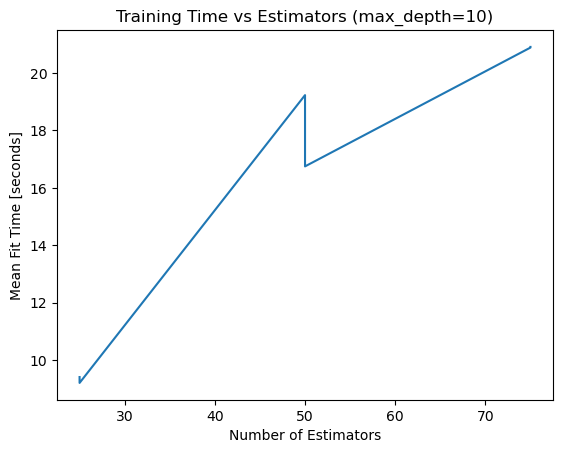

In [112]:
# Create mask
mask =cv_results["param_randomforestclassifier__max_depth"]==10

# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [113]:
#Training Time Vs Maximum Depth
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        model=pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
    return y_test_pred

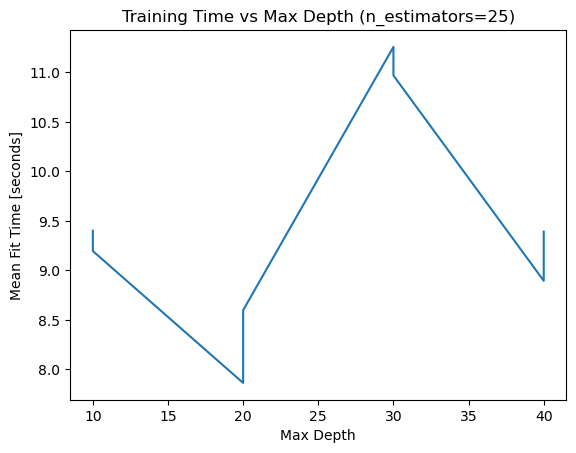

In [114]:
# Create mask

mask = cv_results["param_randomforestclassifier__n_estimators"]== 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)

# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [115]:
# Extract best hyperparameters
model.best_params_
model.best_score_
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50,
                                        random_state=42))])

In [116]:
#Evaluate
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9589


N.B: The ensemble model performed better thab the decision tree model, with an accuracy score than exceeds the baseline score which is a good sign. I'll try another model later to seeif we'll be able toachieve a better result

In [117]:
y_test.value_counts()

bankrupt
False    1913
True       83
Name: count, dtype: int64

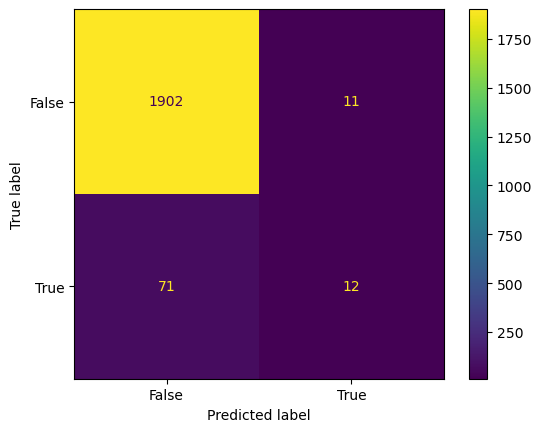

In [118]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [119]:
#Communicate and Extract Feature Importance
features=X_train_over.columns

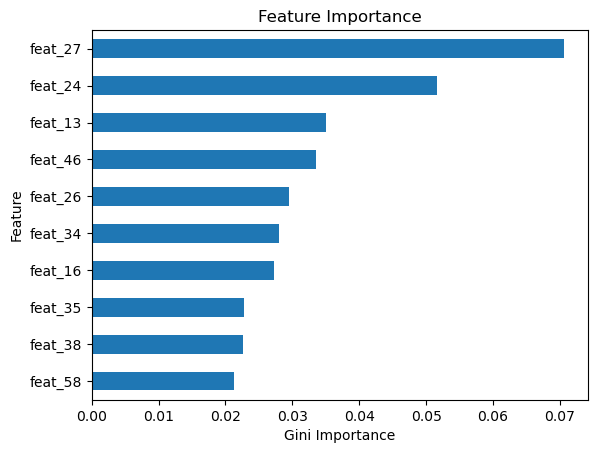

In [120]:
# Get feature names from training data
features = features=X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [121]:
# Save model
with open("model-5-3.pkl", "wb") as f:
    pickle.dump(model, f)

In [122]:
#Make Prediction Function
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        model=pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
    return y_test_pred

In [123]:
y_test_pred = make_predictions(
    data_filepath="data/poland-bankruptcy-data-2009-mvp-features.json.gz",
    model_filepath="model-5-3.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (526,)


company_id
4     False
32    False
34    False
36    False
40    False
Name: bankrupt, dtype: bool

In [124]:
# Explore another type of ensemble model- "Gradient Boosting"
#Build Model
#Baseline
acc_baseline = y_train.value_counts(normalize=True).mean()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5


In [125]:
#Iterate
clf = make_pipeline(SimpleImputer(), GradientBoostingClassifier())

In [126]:
#Hyperparameter Grid
params = {
    "simpleimputer__strategy":["mean", "median"],
    "gradientboostingclassifier__n_estimators":range(20, 31, 5),
    "gradientboostingclassifier__max_depth": range(2, 5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [127]:
#Grid Search CV
model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [128]:
# Fit model to over-sampled training data
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [129]:
#Cross Validation Result
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,48.090646,0.685955,0.021671,0.008166,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.930240,0.913129,0.913129,0.925962,0.911455,0.918783,0.007752,1
17,45.172103,2.922212,0.017836,0.004137,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.915762,0.897006,0.909181,0.915762,0.911455,0.909833,0.006898,2
14,39.361650,1.013164,0.027220,0.006134,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.916749,0.899638,0.898322,0.909181,0.895655,0.903909,0.007877,3
15,39.965118,0.901991,0.043503,0.025565,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.906219,0.889108,0.895031,0.897993,0.902238,0.898118,0.005888,4
12,31.618088,0.612937,0.027169,0.006497,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.901941,0.888450,0.884501,0.896677,0.872284,0.888771,0.010258,5
13,31.922375,0.538410,0.033788,0.004733,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.892399,0.878578,0.885160,0.879237,0.883476,0.883770,0.004980,6
10,36.050862,0.695369,0.030527,0.002198,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.874959,0.877591,0.869365,0.866074,0.866359,0.870870,0.004637,7
8,29.987858,0.535502,0.037452,0.008094,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.862126,0.864758,0.858506,0.857519,0.855826,0.859747,0.003245,8
11,35.727151,0.621643,0.024322,0.006710,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.863442,0.858506,0.846331,0.862126,0.850889,0.856259,0.006610,9
6,24.413505,0.442772,0.029439,0.003534,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.848634,0.844686,0.847318,0.844357,0.853851,0.847769,0.003438,10


In [130]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [131]:
#Evaluate
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9265
Validation Accuracy: 0.8803


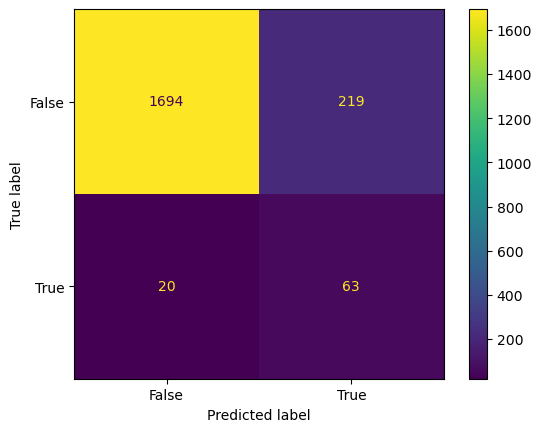

In [132]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [133]:
# Print classification report

print(classification_report(y_test, model.predict(X_test)))  

              precision    recall  f1-score   support

       False       0.99      0.89      0.93      1913
        True       0.22      0.76      0.35        83

    accuracy                           0.88      1996
   macro avg       0.61      0.82      0.64      1996
weighted avg       0.96      0.88      0.91      1996



In [134]:
model.predict(X_test)[:5]

array([False,  True, False,  True, False])

In [135]:
model.predict_proba(X_test)[:5, -1]

array([0.08207889, 0.51871643, 0.08860471, 0.52064087, 0.07456647])

In [136]:
pip install ipywidgets scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [138]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [140]:
#confirm if slide floater is working
slider = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.1, description='Threshold:')
display(slider)

FloatSlider(value=0.5, description='Threshold:', max=1.0)

In [155]:
# Simulated predicted probabilities and true labels
y_true = y_test
y_prob = model.predict_proba(X_test)[:, 1]
def plot_confusion(threshold):
    # Convert probabilities to class predictions based on threshold
    y_pred = (y_prob >= threshold).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    matrix = np.array([[tn, fp], [fn, tp]])
    ax.matshow(matrix, cmap='rainbow', alpha=0.3)
    
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(matrix[i, j]),
                    va='center', ha='center', fontsize=16)
    
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

    # Print metrics with formulas
    print(f"Accuracy = (TP + TN) / (TP + FP + TN + FN) = ({tp} + {tn}) / ({tp} + {fp} + {tn} + {fn}) = {accuracy:.2f}")
    print(f"Precision = TP / (TP + FP) = {tp} / ({tp} + {fp}) = {precision:.2f}")
    print(f"Recall = TP / (TP + FN) = {tp} / ({tp} + {fn}) = {recall:.2f}")

# Create threshold slider
slider = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.1)
interact(plot_confusion, threshold=slider);


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0), Output()), _dom_classes=('widg…

N.B: If you move the probability threshold, you can see that there's a tradeoff between precision and recall. That is, as one gets better, the other suffers.
To decide whether you want a model with better precision or better recall depends on how to intend to use your model, i.e the problem your model is trying to solve.

Two different instances- 1. where recall is more important 2. where precision is more important:
1. I work for a regulatory agency in the European Union as a data scientist. They assist companies and investors navigate insolvency proceedings. I want to build a model to predict which companies could go bankrupt so that you can send debtors information about filing for legal protection before their company becomes insolvent. The administrative costs of sending information to a company is €500. The legal costs to the European court system if a company doesn't file for protection before bankruptcy is €50,000.

    

In [160]:
def interactive_confusion(threshold=0.5):
    # Predictions based on threshold
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    # Costs
    admin_cost = 500 * (tp + fp)
    legal_cost = 50000 * fn
    total_cost = admin_cost + legal_cost

    # Plot
    fig, ax = plt.subplots(figsize=(6, 5))
    cm = np.array([[tn, fp], [fn, tp]])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted No", "Predicted Yes"],
                yticklabels=["Actual No", "Actual Yes"], ax=ax)
    ax.set_title(f"Threshold: {threshold:.2f}")
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Actual")
    plt.show()

    # Display metrics and costs
    print(f"✅ Accuracy: {acc:.2f}")
    print(f"✅ Precision: {prec:.2f}")
    print(f"✅ Recall: {rec:.2f}")
    print("\n--- Business Costs ---")
    print(f" Wasted Admin Cost (TP+FP): €{admin_cost:,}")
    print(f" Wasted Legal Cost (FN): €{legal_cost:,}")
    print(f" Total Estimated Wasted Cost: €{total_cost:,}")

# Create slider
slider = FloatSlider(value=0.5, min=0, max=1, step=0.1, description='Threshold:')

# Interactive widget
interact(interactive_confusion, threshold=slider);


interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=1.0), Output()), _dom_classes=('wid…

### Observation
From the result, the best point to keep the threshold for this model, CONSIDERING ITS PURPOSE is at point 0.2 because this is the point we get the LEAST COST. 
Wated Admin Cost = €464,000,
Wasted Legal Cost = €250,000
Total Estimated Wasted Cost €714,000




For this model, priority was given to recall over precision, because recall is all about quantity. A model that prioritizes recall will cast the widest possible net, which is the reason information was sent to as many potentially-bankrupt companies as possible, because it costs a lot less to send information to a company that might not become bankrupt
than it does to skip a company that does.

For the second example, let's say I work at a private equity firm that purchases distressed businesses, improve them, and then sells them for a profit. I want to build a model to predict which companies will go bankrupt so that the firm can purchase them ahead of their competitors. If the firm purchases a company that is indeed insolvent, it can make a profit of €100 million or more. But if it purchases a company that isn't insolvent and can't be resold at a profit, the firm will lose €250 million.





In [163]:
def interactive_equity_confusion(threshold=0.5):
    # Generate predictions
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    # Business costs/gains
    gain = tp * 100_000_000  # Profit if buy a real distressed company
    loss = fp * 250_000_000  # Loss if buy a healthy company thinking it's distressed
    net_outcome = gain - loss

    # Confusion matrix plot
    fig, ax = plt.subplots(figsize=(6, 5))
    cm = np.array([[tn, fp], [fn, tp]])
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
                xticklabels=["Predicted No", "Predicted Yes"],
                yticklabels=["Actual No", "Actual Yes"], ax=ax)
    ax.set_title(f"Threshold: {threshold:.2f}")
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Actual")
    plt.show()

    # Print performance metrics
    print(f" Accuracy: {acc:.2f}")
    print(f" Precision: {prec:.2f}")
    print(f" Recall: {rec:.2f}")

    # Print financial outcome
    print("\n--- Financial Outcome ---")
    print(f" Profit from true bankruptcies: €{gain:,}")
    print(f" Loss from mistaken buys: €{loss:,}")
    print(f" Net Outcome: €{net_outcome:,}")

# Threshold slider
slider = FloatSlider(value=0.5, min=0, max=1, step=0.1, description="Threshold:")

# Run the interactive dashboard
interact(interactive_equity_confusion, threshold=slider);

interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=1.0), Output()), _dom_classes=('wid…

In this case priority is given to precision because it is at the point profit can be maximized. 
To be more specific maximum profit would be generayed when the threshold is at 0.9. The total profit made would be Profit from true bankruptcies: €1,600,000,000

In [164]:
# Save model
with open("my_bankruptcy_model", "wb") as f:
    pickle.dump(model, f)

### SUMMARY
1. I built a predictive model to determine if a company would go bankrupt or not
2. I explored different models to determine the one with the best options and did some hypertuning. The different models used are: Decision Tree, Ensemble model, gradient boosting
3. Built an interactive dashboard to demonstrate practical differences between precision
and recall
